In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df_org = pd.read_csv('data/df_final.csv', sep=',')

In [55]:
df = df_org.copy()

In [56]:
df = df.drop('Unnamed: 0', axis=1)

In [57]:
df.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,home_coach,home_game_system,home_team_id,guest_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,Bundesliga,2009/10,1,2009-07-18 19:30:00,SV Kapfenberg,SV Ried,Werner Gregoritsch,4-5-1,2394,Paul Gludovatz,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Bundesliga,2009/10,2,2009-07-25 19:30:00,SV Ried,Red Bull Salzburg,Paul Gludovatz,5-4-1,266,Huub Stevens,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.00
2,Bundesliga,2009/10,3,2009-07-31 20:30:00,SC Wiener Neustadt,SV Ried,Helmut Kraft,4-4-2,17444,Paul Gludovatz,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.00
3,Bundesliga,2009/10,4,2009-09-08 19:30:00,SV Ried,SK Rapid Wien,Paul Gludovatz,5-4-1,266,Peter Pacult,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00
4,Bundesliga,2009/10,5,2009-08-21 20:30:00,SK Austria Kärnten,SV Ried,Frenkie Schinkels,4-5-1,11609,Paul Gludovatz,...,0.0,0.0,1.0,0.5,0.5,1.0,1.0,0.0,0.0,1.75


In [58]:
df.shape

(2509, 39)

In [59]:
y_reg = df.resultNumeric
y_cat = (pd.get_dummies(np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))))

In [60]:
ndf = df.shape[0]
df = df.drop(['resultNumeric'], axis=1)
df.shape

(2509, 38)

In [62]:
ndf

2509

In [63]:
df.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,home_coach,home_game_system,home_team_id,guest_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,Bundesliga,2009/10,1,2009-07-18 19:30:00,SV Kapfenberg,SV Ried,Werner Gregoritsch,4-5-1,2394,Paul Gludovatz,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Bundesliga,2009/10,2,2009-07-25 19:30:00,SV Ried,Red Bull Salzburg,Paul Gludovatz,5-4-1,266,Huub Stevens,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.00
2,Bundesliga,2009/10,3,2009-07-31 20:30:00,SC Wiener Neustadt,SV Ried,Helmut Kraft,4-4-2,17444,Paul Gludovatz,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.00
3,Bundesliga,2009/10,4,2009-09-08 19:30:00,SV Ried,SK Rapid Wien,Paul Gludovatz,5-4-1,266,Peter Pacult,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00
4,Bundesliga,2009/10,5,2009-08-21 20:30:00,SK Austria Kärnten,SV Ried,Frenkie Schinkels,4-5-1,11609,Paul Gludovatz,...,0.0,0.0,1.0,0.5,0.5,1.0,1.0,0.0,0.0,1.75


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 38 columns):
competition                     2509 non-null object
saison                          2509 non-null object
gameday                         2509 non-null object
date                            2509 non-null object
home_team_name                  2509 non-null object
guest_team_name                 2509 non-null object
home_coach                      2509 non-null object
home_game_system                2509 non-null object
home_team_id                    2509 non-null int64
guest_coach                     2509 non-null object
guest_game_system               2509 non-null object
guest_team_id                   2509 non-null int64
time                            2509 non-null object
viewers                         2509 non-null int64
weekday                         2509 non-null int64
day                             2509 non-null int64
month                           2509 non-null int6

In [65]:
df = df.drop(['date', 'home_team_id', 'guest_team_id'], axis=1)

In [66]:
from keras.utils import to_categorical

In [67]:
categorial_variables = df.columns[:17]
categorial_variables = categorial_variables.drop('viewers')
categorial_variables

Index(['competition', 'saison', 'gameday', 'home_team_name', 'guest_team_name',
       'home_coach', 'home_game_system', 'guest_coach', 'guest_game_system',
       'time', 'weekday', 'day', 'month', 'year', 'homeTotalGoalsShoot',
       'homeTotalGoalsReceived'],
      dtype='object')

In [68]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
df = df.drop(categorial_variables, axis=1)

In [69]:
df.shape

(2509, 761)

In [70]:
df.head()

,viewers,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,homeTeamGoalsReceivedAway,...,time_20:25,time_20:30,time_20:35,time_20:45,time_21:00,time_21:05,time_21:15,time_21:45,time_22:15,time_22:30
0,3450,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7600,1.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2700,0.0,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7600,1.0,0.0,0.00,0.00,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5079,0.0,1.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Columns: 761 entries, viewers to time_22:30
dtypes: float64(18), int64(1), uint8(742)
memory usage: 2.1 MB


In [74]:
X = df

In [75]:
X.shape, y.shape

((2509, 761), (2509,))

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=4)

In [81]:
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_Classification_acc')

In [82]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(761, 3)

In [83]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [84]:
model_1.compile(optimizer='adam', loss='mse')

In [85]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Instructions for updating:
Use tf.cast instead.
Train on 2007 samples, validate on 502 samples
Epoch 1/100
2007/2007 [==============================] - 1s 434us/step - loss: 4.4460 - val_loss: 4.4147
Epoch 2/100
2007/2007 [==============================] - 0s 169us/step - loss: 3.5500 - val_loss: 4.1550
Epoch 3/100
2007/2007 [==============================] - 0s 148us/step - loss: 3.0351 - val_loss: 4.0306
Epoch 4/100
2007/2007 [==============================] - 0s 137us/step - loss: 2.6480 - val_loss: 3.9804
Epoch 5/100
2007/2007 [==============================] - 0s 131us/step - loss: 2.3566 - val_loss: 4.0123
Epoch 6/100
2007/2007 [==============================] - 0s 157us/step - loss: 2.1047 - val_loss: 4.0731
Epoch 7/100
2007/2007 [==============================] - 0s 157us/step - loss: 1.8882 - val_loss: 4.1412
Epoch 8/100
2007/2007 [==============================] - 0s 157us/step - loss: 1.7105 - val_loss: 4.1950
Epoch 9/100
2007/2007 [==============================] - 0s 183us

2007/2007 [==============================] - 0s 143us/step - loss: 0.1207 - val_loss: 6.2973
Epoch 76/100
2007/2007 [==============================] - 0s 170us/step - loss: 0.1298 - val_loss: 6.2511
Epoch 77/100
2007/2007 [==============================] - 0s 170us/step - loss: 0.1277 - val_loss: 6.3346
Epoch 78/100
2007/2007 [==============================] - 0s 173us/step - loss: 0.1194 - val_loss: 6.2659
Epoch 79/100
2007/2007 [==============================] - 0s 172us/step - loss: 0.1148 - val_loss: 6.3694
Epoch 80/100
2007/2007 [==============================] - 0s 163us/step - loss: 0.1211 - val_loss: 6.3171
Epoch 81/100
2007/2007 [==============================] - 0s 168us/step - loss: 0.1097 - val_loss: 6.3047
Epoch 82/100
2007/2007 [==============================] - 0s 163us/step - loss: 0.1066 - val_loss: 6.4579
Epoch 83/100
2007/2007 [==============================] - 0s 175us/step - loss: 0.0974 - val_loss: 6.2978
Epoch 84/100
2007/2007 [==============================] - 0

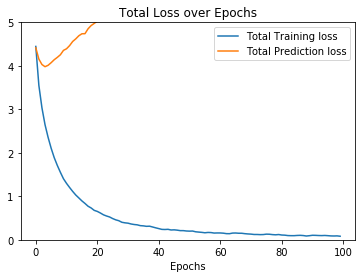

In [86]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [89]:
rfr = RandomForestRegressor(n_estimators=10)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8509110002276398

In [90]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

58.41846067314986

In [92]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [93]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [94]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [95]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 761)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 6096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [96]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 2007 samples, validate on 502 samples
Epoch 1/50
2007/2007 [==============================] - 12s 6ms/step - loss: 5.5407 - Regression_loss: 4.4569 - Classification_loss: 1.0838 - Regression_acc: 0.2252 - Classification_acc: 0.4245 - val_loss: 77755.2065 - val_Regression_loss: 77752.2393 - val_Classification_loss: 2.9676 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.2470
Epoch 2/50
2007/2007 [==============================] - 10s 5ms/step - loss: 5.5181 - Regression_loss: 4.4478 - Classification_loss: 1.0704 - Regression_acc: 0.2252 - Classification_acc: 0.4270 - val_loss: 80885.1887 - val_Regression_loss: 80881.6121 - val_Classification_loss: 3.5769 - val_Regression_acc: 0.0020 - val_Classification_acc: 0.2769
Epoch 3/50
2007/2007 [==============================] - 10s 5ms/step - loss: 5.5145 - Regression_loss: 4.4470 - Classification_loss: 1.0675 - Regression_acc: 0.2252 - Classification_acc: 0.4270 - val_loss: 75548.9193 - val_Regression_loss: 75545.2792 - va

In [97]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [98]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [99]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [100]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 761)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 761)               579882    
_________________________________________________________________
batch_normalization_3 (Batch (None, 761)               3044      
_________________________________________________________________
hidden_2 (Dense)             (None, 761)               579882    
_________________________________________________________________
Regression (Dense)           (None, 1)                 762       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 1,163,576
Trainable params: 1,162,054
Non-trainable params: 1,522
______________________________________________________________

In [101]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 2007 samples, validate on 502 samples
Epoch 1/100
1644/2007 [=======================>......] - ETA: 29s - loss: 5.6023 - Regression_loss: 4.5198 - Classification_loss: 1.0825 - Regression_acc: 0.2202 - Classification_acc: 0.4209 - ETA: 1:49 - loss: 5.51 - ETA: 1:40 - loss: 5.4250 - Regression_loss: 4.3316 - Classification_loss: 1.0935 - Regression_acc: 0 - ETA: 1:37 - loss: 5.3427 - Regression_loss: 4.2495 - Classification_loss: 1.0933 - Regre - ETA: 1:34 - loss: 5.3503 - Regression_loss: 4.2567 - Classification_loss: 1.0937 - Regression_ - ETA: 1:21 - loss: 5.3815 - Regres - ETA: 1: - ETA: 45s - loss: 5.4351 - Regression_loss: 4.3497 - Classification_loss: 1.0854 - Regression_acc: 0.2269 - Cl - ETA: 44s - loss: 5.4298 - Reg - ETA: 35s - loss: 5.5423 - Regression_loss: 4.4578 - Classification_loss: 1.0845 - Regression_acc: 0 -

KeyboardInterrupt: 

In [181]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(11.462805, array([0.0648931, 0.0077849, 0.2104663], dtype=float32))

In [102]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
hidden_2 = Dense(in_cols*2, activation='relu', name='hidden_2')(hidden_1)
hidden_3 = Dense(in_cols*4, activation='relu', name='hidden_3')(hidden_2)
hidden_4 = Dense(in_cols*4, activation='relu', name='hidden_4')(hidden_3)
output_tensor_reg = Dense(1, name='Regression')(hidden_4)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [103]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [104]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [105]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 761)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 1522)              1159764   
_________________________________________________________________
hidden_2 (Dense)             (None, 1522)              2318006   
_________________________________________________________________
hidden_3 (Dense)             (None, 3044)              4636012   
_________________________________________________________________
hidden_4 (Dense)             (None, 3044)              9268980   
_________________________________________________________________
Regression (Dense)           (None, 1)                 3045      
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total para

In [106]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor, model_save],
    verbose=True)

Train on 2007 samples, validate on 502 samples
Epoch 1/50
  28/2007 [..............................] - ETA: 27:44 - loss: 20.2215 - Regression_loss: 19.0504 - Classification_loss: 1.1711 - Regression_acc: 0.1071 - Classification_acc: 0.3929

KeyboardInterrupt: 

In [187]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(11.462805, array([0.0648931, 0.0077849, 0.2104663], dtype=float32))

In [188]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(0.45792094, array([0.3171984 , 0.29628068, 0.58179057], dtype=float32))

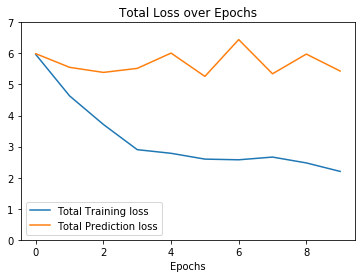

In [189]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

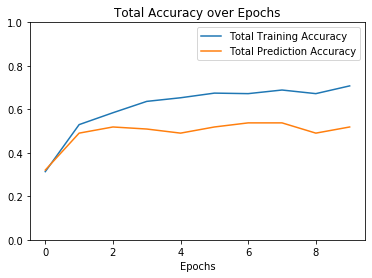

In [190]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])

In [191]:
model_4_prediction = pd.DataFrame(model_4.predict(X_test_scaled)[1])
model_4_prediction.columns = ['draw', 'lost', 'won']

In [231]:
model_4_prediction.head()

,draw,lost,won
0,0.349967,0.456649,0.461337
1,0.312514,0.275509,0.599061
2,0.354547,0.480072,0.444976
3,0.467312,0.892292,0.146693
4,0.222483,0.041643,0.872570


In [ ]:
from sklearn.metrics import confusion_matrix

In [232]:
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm

array([[ 0,  9, 11],
       [ 0, 33, 12],
       [ 0, 19, 22]], dtype=int64)

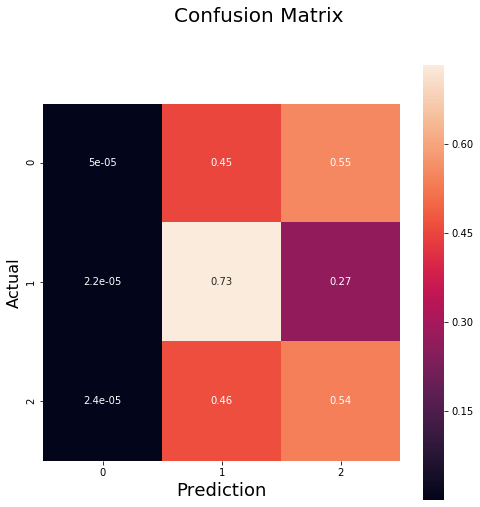

In [203]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, ax = ax, annot=True, square=True)
fig.suptitle('Confusion Matrix', fontsize=20)
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.show()


#### michi code
def pretty_confusion(target, prediction):
    """Prettify the on-board confusion matrix of sklearn."""
    
    cmc = ["Condition positive", "Condition negative"]
    cmi = ["Predicted condition positive", "Predicted condition negative"]
    
    matrix = confusion_matrix(target, prediction)
    cm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return pd.DataFrame(cm , columns=cmc, index=cmi)

In [193]:
cm

array([[0.        , 0.45      , 0.55      ],
       [0.        , 0.73333333, 0.26666667],
       [0.        , 0.46341463, 0.53658537]])

In [194]:
y_class_test

,draw,lost,won
11,0,0,1
444,0,0,1
414,0,0,1
150,1,0,0
473,1,0,0
75,0,0,1
504,0,0,1
102,0,0,1
424,0,0,1
291,0,0,1


In [197]:
y_cat.head()

,draw,lost,won
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
